In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv(r"C:\Users\MSI\Documents\data_analysis projects\Website_Traffic_forecasting\Thecleverprogrammer.csv")
print(data.head())


         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [14]:
#Coverting date column into Datetime data type
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


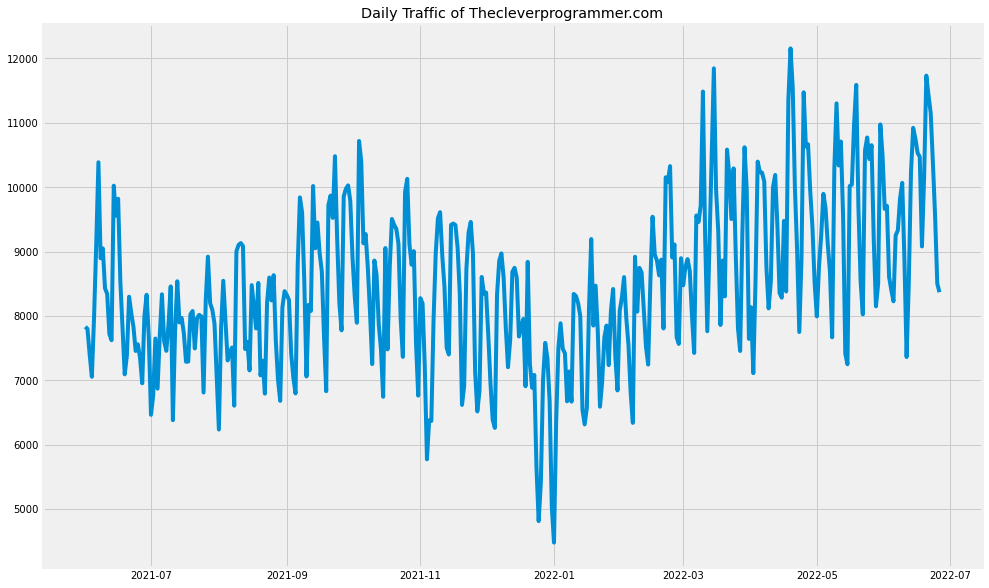

In [15]:
#Getting Daily Traffic of the Website
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 432x288 with 0 Axes>

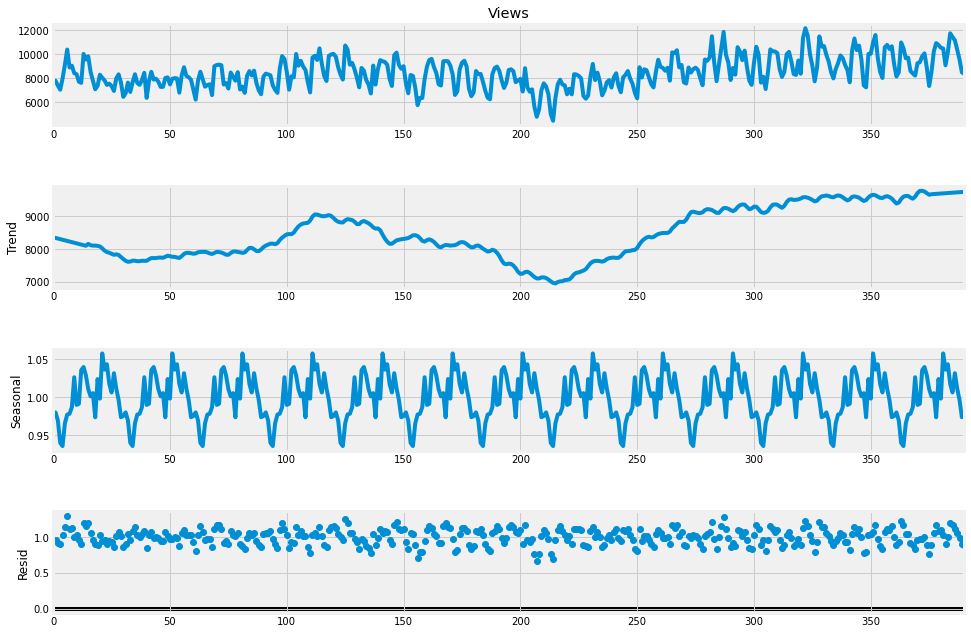

In [27]:
# Multiplicative Decomposition  
result = seasonal_decompose(data["Views"], model='multiplicative', extrapolate_trend='freq', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

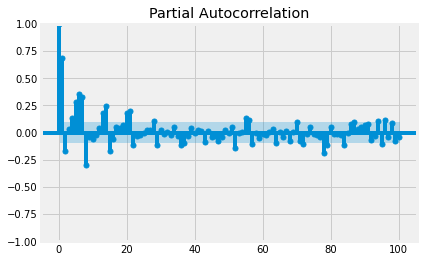

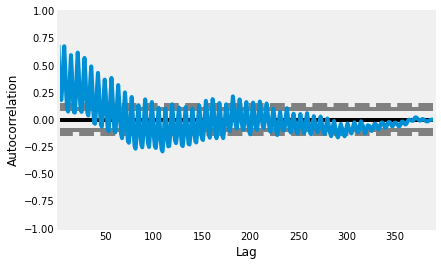

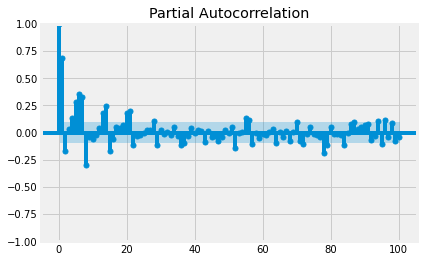

In [32]:
#autocorrelation and partial autocorrelation plots
pd.plotting.autocorrelation_plot(data["Views"])
plot_pacf(data["Views"], lags= 100)

P = 5

Q = 2

In [34]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\MSI\miniconda3\envs\minimal_ds\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\miniconda3\envs\minimal_ds\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.096
Date:                            Thu, 07 Jul 2022   AIC                           6228.193
Time:                                    04:36:25   BIC                           6287.216
Sample:                                         0   HQIC                          6251.618
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7625      0.129      5.914      0.000       0.510       1.015
ar.L2         -0.7647      0.135   

In [36]:
#Predict Traffic for next 50 days
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9872.710699
392    10776.872109
393    10748.137400
394     9915.463233
395     8820.403595
396     8234.309536
397     8907.653965
398     9672.239906
399    10264.289461
400    10638.699544
401     9920.798664
402     9396.329785
403     9036.140210
404     9044.502618
405    10504.022530
406    11009.915891
407    10962.868568
408    10176.776553
409     9492.844664
410     8630.839879
411     9125.799851
412    10337.472893
413    10611.564324
414    10850.896783
415    10352.534690
416     9482.936876
417     9023.522295
418     9132.524060
419     9865.330760
420    10243.126845
421    10787.010305
422     9985.411074
423     9583.025372
424     9044.895486
425     8783.584414
426    10103.068111
427    10864.811699
428    10975.148073
429    10493.189750
430     9499.729219
431     8685.931995
432     8660.864165
433    10015.106827
434    10522.481895
435    10928.441001
436    10573.368346
437     9383.629453
438     9164.117736
439     9302.684624
440    10244.547537


<AxesSubplot:>

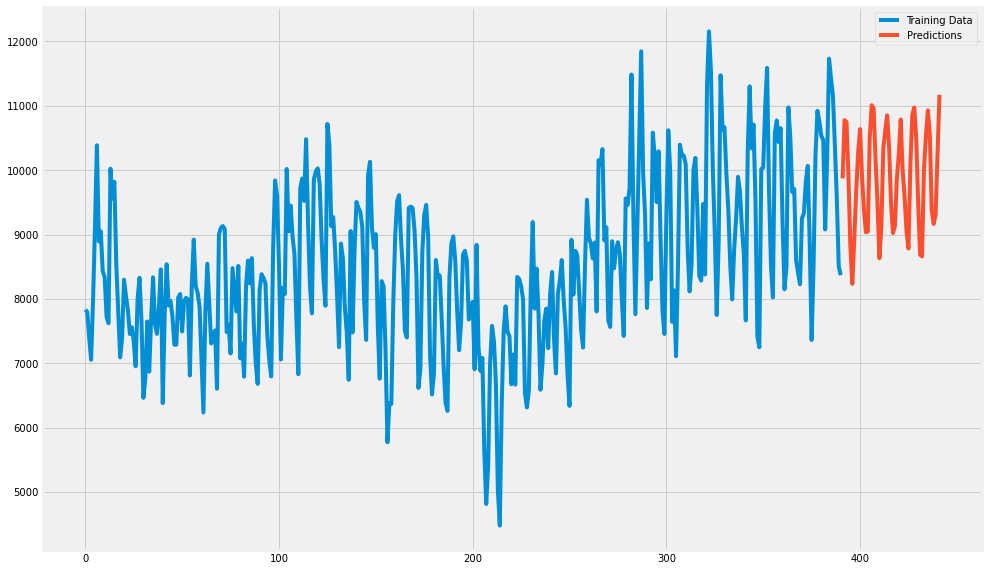

In [37]:
#plot the predictions
data["Views"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")